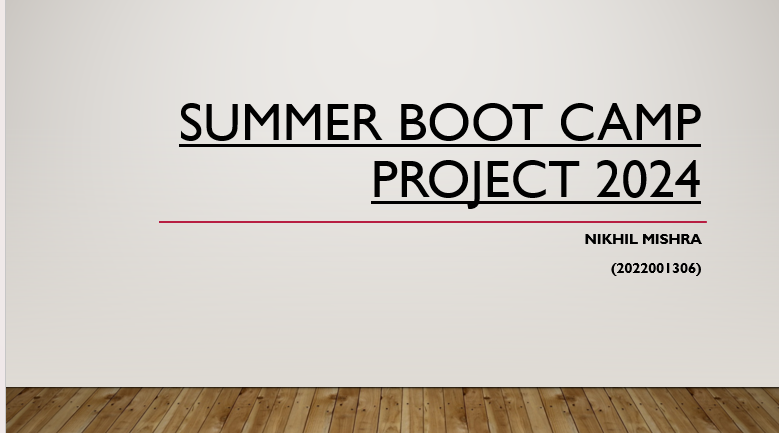

# INDEX

### LIST OF TABLES

### LIST OF FIGURES

# PROBLEM STATEMENT OBJECTIVE

##### The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. Importing the necessary Libraries

##### importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### loading the dataset

In [2]:
dataset = pd.read_csv("C:/Users/munna/Downloads/2-foodhub_order_New.csv")
dataset

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23.0,31


# BASIC EXPLORATION

##### DATA HEAD(TOP 5 ROWS)

In [3]:
dataset.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


##### DATA TAIL(LAST 5 ROW)

In [4]:
dataset.tail(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23.0,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28.0,24


# OBSERVATION

##### In Delivery_time '?'is there need to check in future
In Rating , In some of the data rating is not given


# DATA WRANGLING

##### SHAPE OF DATA

In [5]:
dataset.shape

(1898, 9)

##### NUMBER OF ROWS ARE 1899 AND NUMBER OF COLUMNS ARE 9 

# DATA TYPES OF EACH FEATURE

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1898 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


In [7]:
dataset.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time    float64
delivery_time             object
dtype: object

### Statistical Summary

In [8]:
dataset.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time
count,1.898000e+03,1898.000000,1898.000000,1896.000000
mean,1.477496e+06,171168.478398,80.722007,27.371835
std,5.480497e+02,113698.139743,2798.141333,4.634211
min,1.476547e+06,1311.000000,0.000000,20.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000
50%,1.477496e+06,128600.000000,14.160000,27.000000
75%,1.477970e+06,270525.000000,22.310000,31.000000
max,1.478444e+06,405334.000000,121920.000000,35.000000


### The NULL Values

##### check for missing values in column

In [9]:
dataset.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64

##### to fetch all the rows having null value

In [10]:
dataset[dataset.isnull().sum(axis=1)>0]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
11,1478437,221206,Empanada Mama (closed),NaN,8.10,Weekend,5,23.0,22
51,1477883,91817,Blue Ribbon Fried Chicken,NaN,29.39,Weekend,Not given,27.0,28
95,1477027,164016,Blue Ribbon Fried Chicken,NaN,16.39,Weekend,Not given,27.0,22
140,1477376,370372,Blue Ribbon Fried Chicken,American,11.59,Weekday,Not given,NaN,24
188,1477872,300670,Shake Shack,American,13.39,Weekend,Not given,NaN,22


# The Duplicate Values

#### check for the duplicate values

In [11]:
dataset.duplicated().sum()

0

#### there are 0 duplicate values

# The Anomalies or Wrong Entries

###### From above Obvervation we found wrong entry in delivery time
##### 
Check for all unique values in delivery time


In [12]:
dataset["delivery_time"].unique()

array(['20', '?', '28', '15', '24', '21', '30', '26', '22', '17', '23',
       '25', '16', '29', '27', '18', '31', '32', '19', '33'], dtype=object)

##### Shows the columns which have entry '?' in delivery Time

In [13]:
dataset[dataset["delivery_time"] == '?']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
180,1476808,84700,Pepe Giallo,Italian,14.60,Weekday,3,32.0,?


##### Replacing all '?' with the NULL

In [14]:
dataset['dataset_time']=dataset['delivery_time'].replace('?',np.nan)
dataset

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,dataset_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24,24
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23.0,31,31


In [15]:
dataset['delivery_time'].unique()

array(['20', '?', '28', '15', '24', '21', '30', '26', '22', '17', '23',
       '25', '16', '29', '27', '18', '31', '32', '19', '33'], dtype=object)

# OUTLIERS

##### first check for outliers

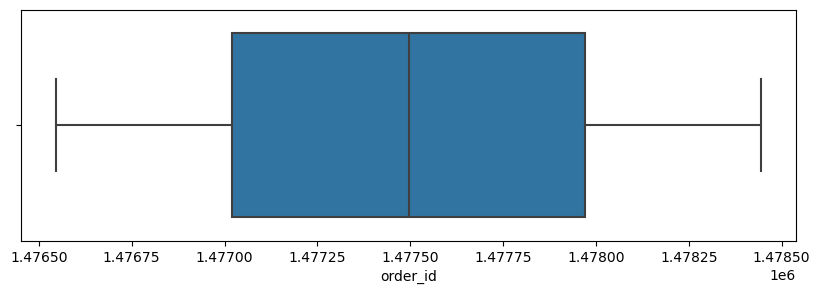

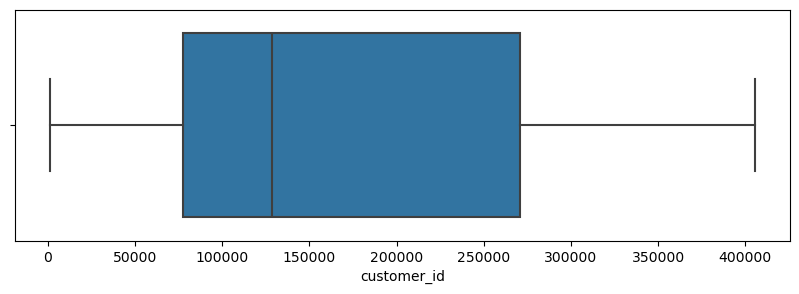

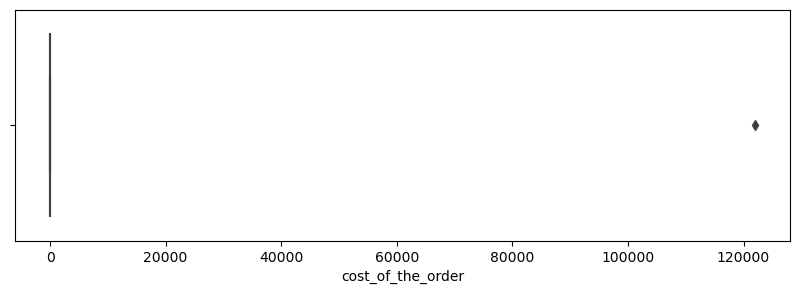

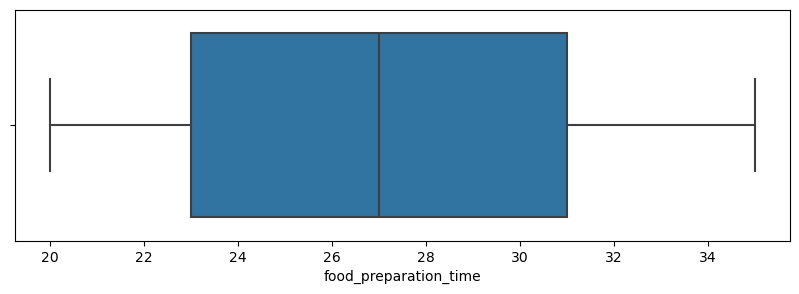

In [16]:
for i in['order_id','customer_id','cost_of_the_order','food_preparation_time']:
    plt.figure(figsize=(10,3))
    sns.boxplot(data=dataset,x=i)
    plt.show()

##### Remove outliers

In [17]:
def remove_outliers(col):
 sorted(col)
 Q1,Q3=col.quantile([0.25,0.75])
 IQR=Q3-Q1
 lower_range=Q1-(1.5*IQR)
 upper_range=Q3+(1.5*IQR)
 return lower_range,upper_range

##### Since, ouliers is present in Cost of the order so REPLACING NULL values in Numerical Columns using Median

In [18]:
median1=dataset['cost_of_the_order'].median()
median2=dataset['customer_id'].median()
median3=dataset['order_id'].median()
median4=dataset['food_preparation_time'].median()
dataset['cost_of_the_order'].replace(np.nan,median1,inplace=True)
dataset['customer_id'].replace(np.nan,median2,inplace=True)
dataset['order_id'].replace(np.nan,median3,inplace=True)
dataset['food_preparation_time'].replace(np.nan,median4,inplace=True)

##### REPLACING NULL values in categorical columns using Mode

In [19]:
mode1=dataset['restaurant_name'].mode().values[0]
mode2=dataset['cuisine_type'].mode().values[0]
mode3=dataset['day_of_the_week'].mode().values[0]
mode4=dataset['rating'].mode().values[0]
dataset['restaurant_name']=dataset['restaurant_name'].replace(np.nan,mode1)
dataset['cuisine_type']=dataset['cuisine_type'].replace(np.nan,mode2)
dataset['day_of_the_week']=dataset['day_of_the_week'].replace(np.nan,mode3)
dataset['rating']=dataset['rating'].replace(np.nan,mode4)

In [20]:
ll,ul=remove_outliers(dataset['cost_of_the_order'])
dataset['cost_of_the_order']=np.where(dataset['cost_of_the_order']>ul,ul,dataset['cost_of_the_order'])
dataset['cost_of_the_order']=np.where(dataset['cost_of_the_order']<ll,ll,dataset['cost_of_the_order'])

##### Boxplots after Outliers treatment

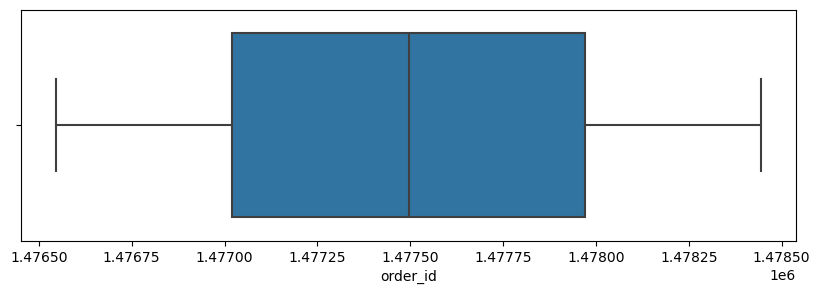

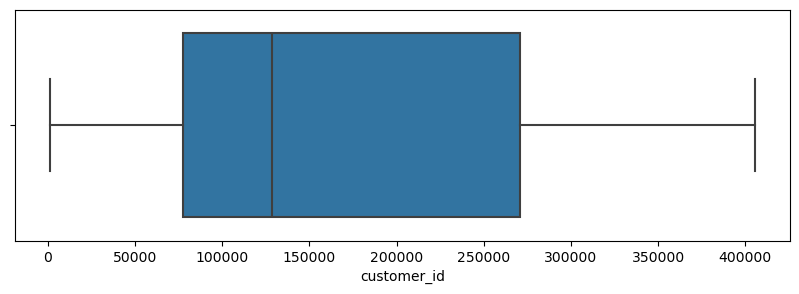

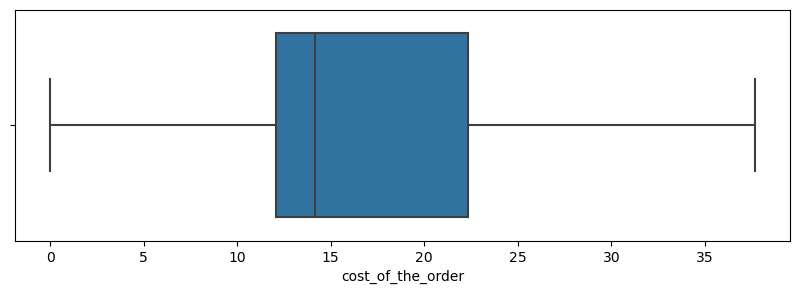

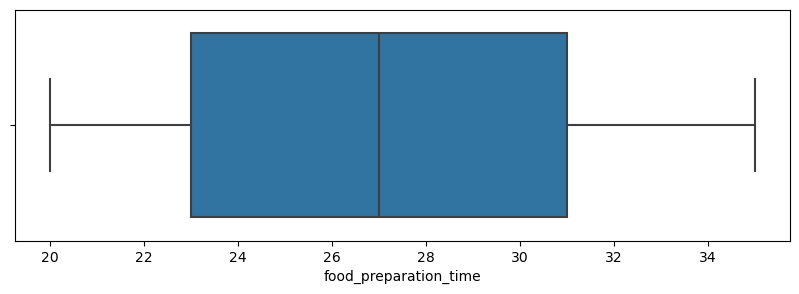

In [21]:
for i in ['order_id','customer_id','cost_of_the_order','food_preparation_time']:
 plt.figure(figsize=(10,3))
 sns.boxplot(data=dataset,x=i)
 plt.show()

##### Check for missing values in any column

In [22]:
dataset.isnull().sum()
dataset

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,dataset_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24,24
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31.0,17,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31.0,19,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23.0,31,31


# 1.	Order Analysis

##### a)	What is the total number of orders in the dataset ?

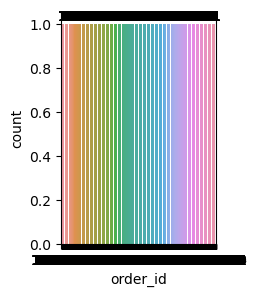

In [29]:
plt.figure(figsize=(2, 3))
tno=sns.countplot(data=dataset,x=dataset['order_id'])
for bars in tno.containers:
    tno.bar_label(bars)

##### b)	What is the average cost of an order?

In [30]:
average_cost_of_order=dataset['cost_of_the_order'].mean()
average_cost_of_order

16.50580874604847

##### The Average Cost of Order is 16.50

##### c)	How many unique customers have placed orders?

In [31]:
unique_customers=dataset['customer_id'].nunique()
unique_customers

1200

##### The total Number of Unique customers have placed orders are 1200

##### d)	Which restaurant has received the highest number of orders

In [33]:
restaurant_order_counts = dataset['restaurant_name'].value_counts()
top_restaurant = restaurant_order_counts.idxmax()
top_order_count = restaurant_order_counts.max()
top_restaurant,top_order_count

('Shake Shack', 219)

##### >Restaurant Shake Shack has received the highest number of orders : 219

# 2. Customer Behavior
##### a) What is the average rating given by customers?

In [47]:
dataset['rating'].unique()


array(['Not given', '5', '3', '4'], dtype=object)

In [48]:
dataset['rating']=dataset['rating'].replace(np.nan,0)

In [ ]:
dataset['rating']=dataset['rating'].astype('int')

In [50]:
dataset.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time    float64
delivery_time             object
dataset_time              object
dtype: object

##### b) How does the rating vary between weekdays and weekends?

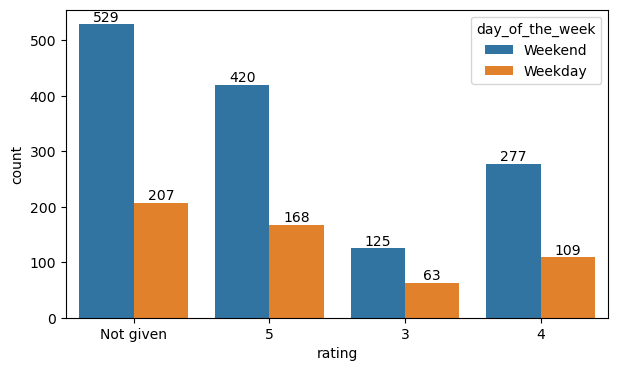

In [53]:
plt.figure(figsize=(7,4))
bx = sns.countplot(data=dataset,x="rating",hue="day_of_the_week")
for bars in bx.containers:
 bx.bar_label(bars)

##### c) Which cuisine type is ordered the most?

In [55]:
cuisine_type=dataset['cuisine_type'].value_counts()
top_cuisine_type=cuisine_type.idxmax()
most_cuisine_type=cuisine_type.max()
top_cuisine_type,most_cuisine_type

('American', 585)

##### • What is the distribution of orders across different days of the week?

In [57]:
dataset['day_of_the_week'].unique()


array(['Weekend', 'Weekday'], dtype=object)

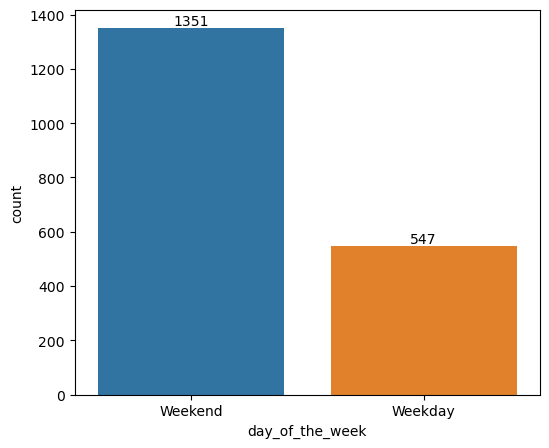

In [58]:
plt.figure(figsize=(6,5))
ax=sns.countplot(data=dataset,x='day_of_the_week')
for i in ax.containers:
 ax.bar_label(i)


# 3. Restaurant Performance
##### • What is the average food preparation time for each restaurant?

In [60]:
dataset.groupby(['restaurant_name'],as_index=False)['food_preparation_time'].mean().sort_values(by='food_preparation_time')

,restaurant_name,food_preparation_time
68,Haru Gramercy Park,20.0
3,67 Burger,20.0
58,Frank Restaurant,20.0
43,DespaÌ±a,20.5
132,Sarabeth's West,21.0
...,...,...
148,Taro Sushi,35.0
39,Cipriani Le Specialita,35.0
83,Kambi Ramen House,35.0
85,Klong,35.0


##### • Which restaurant has the shortest average food preparation time?

In [61]:
dataset.groupby(['restaurant_name'],as_index=False)['food_preparation_time'].mean().sort_values(by='food_preparation_time')

,restaurant_name,food_preparation_time
68,Haru Gramercy Park,20.0
3,67 Burger,20.0
58,Frank Restaurant,20.0
43,DespaÌ±a,20.5
132,Sarabeth's West,21.0
...,...,...
148,Taro Sushi,35.0
39,Cipriani Le Specialita,35.0
83,Kambi Ramen House,35.0
85,Klong,35.0


##### How does the average delivery time compare across different restaurants?

In [ ]:
dataset['delivery_time']=dataset['delivery_time'].astype('int')


In [ ]:
df.groupby(['restaurant_name'],as_index=False)['delivery_time'].mean().sort_values(by='delivery_time',ascending)

In [67]:
# avg_time=df.groupby('restaurant_name')['delivery_time'].mean().reset_index()
# plt.figure(figsize=(30,5))
# sns.pointplot(data=df,x=avg_time['restaurant_name'],y=avg_time['delivery_time'])
# plt.xticks(rotation=90)
# plt.show()

##### d) Is there a correlation between the cost of the order and the rating given?

In [ ]:
dataset[['cost_of_the_order','rating']].corr()

In [ ]:
sns.heatmap(data=dataset[['cost_of_the_order','rating']].corr())

# Demand Patterns
##### a) How does the demand for different cuisine types vary on weekdays versus weekends

In [70]:
dataset.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Mexican            24
                 Indian             24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          416
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            52
                 Indian             49
                 Middle Eastern     32
                 Mediterranean      32
                 Thai               15
                 French             13
                 Korean         

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

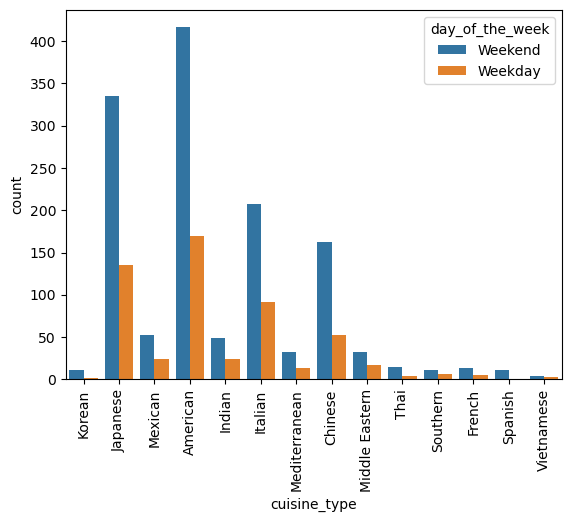

In [71]:
sns.countplot(data=dataset,x=dataset['cuisine_type'],hue=dataset['day_of_the_week'])
plt.xticks(rotation=90)


##### b) Which day of the week has the highest average order cost?


In [72]:
dataset.groupby('day_of_the_week')['cost_of_the_order'].mean()

day_of_the_week
Weekday    16.311188
Weekend    16.584608
Name: cost_of_the_order, dtype: float64

<Axes: xlabel='day_of_the_week', ylabel='cost_of_the_order'>

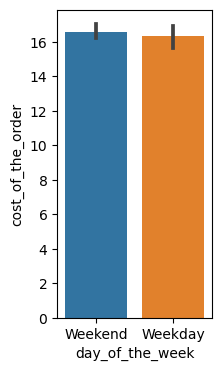

In [73]:
plt.figure(figsize=(2,4))
sns.barplot(data=dataset,x=dataset['day_of_the_week'],y=dataset['cost_of_the_order'])

##### c) What is the most common day for orders to be placed?

In [74]:
dataset1=dataset.groupby('day_of_the_week')['order_id'].count()
dataset1

day_of_the_week
Weekday     547
Weekend    1351
Name: order_id, dtype: int64

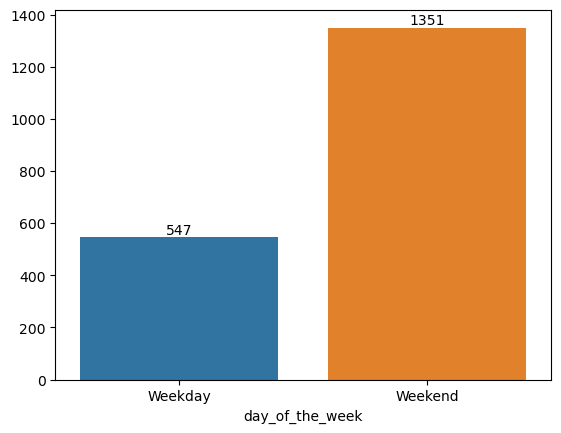

In [75]:
cdo=sns.barplot(data=dataset,x=dataset1.index,y=dataset1.values)
for i in cdo.containers:
 cdo.bar_label(i)

##### d) How does the average rating vary by cuisine type?

In [ ]:
dataset.groupby('cuisine_type')['rating'].mean()

In [ ]:
plt.figure(figsize=(15,5))
cr=sns.barplot(data=dataet,x=dataset['cuisine_type'],y=dataset['rating'])
plt.xticks(rotation=90)
for i in cr.containers:
 cr.bar_label(i)

# 5. Operational Efficiency
##### a) What is the average delivery time for all orders?


In [ ]:
dataset['delivery_time'].mean()

##### b) Which restaurant has the longest average delivery time?

In [ ]:
longest_avg_dt=dataset.groupby('restaurant_name')['delivery_time'].mean()
longest_avg_dt.idxmax(),longest_avg_dt.max()